#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem
# Name: Shanshan Qu   
# username: shanshaq


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

## Delivering
**Deadline**: *Friday, February 21, 2020*

## What to deliver?
Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: if you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
#import csv file
import csv
with open("european_cities.csv","r") as f:data=list(csv.reader(f, delimiter=';'))
cities=data[0]
distances=data[1:]

import itertools
import time 
start_time = time.time()

def calculate_distance(n, order):
    distanceTravelled = 0
    for i in range(0, n-1):
        start = order[i]
        end = order[i+1]
        distanceTravelled+= float(distances[start][end])
    distanceTravelled+= float(distances[order[n-1]][order[0]])
    return distanceTravelled    

def exhaustive_search(n):
    tour = []
    best_tour=[]
    min_distance=0
    
    i = 0
    for i in range(0,n):
        tour.append(i)
    #List all the possiblities(permutations) of these cities
    options=list(itertools.permutations(tour,n))
    
    for order in options:
        distanceTravelled = calculate_distance(n, order)

        if min_distance == 0:
            min_distance = distanceTravelled
            best_order = order
        elif distanceTravelled < min_distance:
            min_distance = distanceTravelled
            best_order = order
            
    print("Best tour: ", best_order)
    print("Route: ", [(cities[i]) for i in best_order])
    print("Minimal distance: ", min_distance)

# Find answer for 6 cities
exhaustive_search(6)
print("Time for running: %s seconds" % (time.time() - start_time))


Best tour:  (0, 1, 4, 5, 2, 3)
Route:  ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels']
Minimal distance:  5018.8099999999995
Time for running: 0.004987478256225586 seconds


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [2]:
start_time = time.time()
exhaustive_search(10)
print("Time for running: %s seconds" % (time.time() - start_time))

Best order:  (6, 8, 3, 7, 0, 1, 9, 4, 5, 2)
Route:  ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin']
Minimal distance:  7486.309999999999
Time for running: 15.429791450500488 seconds


### My explanation
The shortest tour and the route is shown in the code (6, 8, 3, 7, 0, 1, 9, 4, 5, 2)
Time for running this is about 15.429791450500488 seconds
It's a really time-consuming work to perform exhaustive search on all 24 cities.
For 10 cities, we have 10! permutations with 15.43s.
24 cities have 24! permutations.The estimated time is 2.638205147361079e+21s, and about 83656936433316.81 years.  
The calculation is as follows.

In [6]:
time_per_loop=(15.43 *1000)/ math.factorial(10) 

seconds= time_per_loop * math.factorial(24)

years= seconds/60/60/24/365

print(seconds) # time in seconds
print(years)  # time in years


2.638205147361079e+21
83656936433316.81


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**.

In [5]:
def change_index(order, n):
    
    order=order.copy()
    # Choose two indexes randomly without replacement
    i,j=np.random.choice(list(range(0,n)),2,replace=False)
    # Swap their order          
    order[i],order[j]=order[j], order[i]
    return order

def hill_climber(n):
    max = 1000
    # Start with a random order    
    cities_order = np.arange(n)
    np.random.shuffle(cities_order)
    
    # Calculate distance of this order
    i = 0
    distanceTravelled = calculate_distance(n, cities_order)  
    min_distance = distanceTravelled
    
    # Find some neighbours and compare the distance
    for i in range(max):
        new_order = change_index(cities_order,n)
        new_distance = calculate_distance(n, new_order)
        
        if(new_distance < min_distance):
            min_distance = new_distance
            cities_order = new_order
            
    return cities_order, min_distance
    

print("Best tour: ", hill_climber(10)[0])
print("Route: ", [(cities[i]) for i in hill_climber(10)[0]])
print("Minimal distance: ", hill_climber(10)[1])


Best tour:  [4 5 2 6 8 3 7 0 1 9]
Route:  ['Brussels', 'Berlin', 'Budapest', 'Belgrade', 'Istanbul', 'Bucharest', 'Copenhagen', 'Hamburg', 'Dublin', 'Barcelona']
Minimal distance:  7737.95


In [ ]:
# Here we run this hill climbing algorithm 20 times for both 10 cities and 24 cities
all_results_10_cities=[]
all_results_24_cities=[]

i = 0
for i in range(20):
    all_results_10_cities.append(hill_climber(10)[1])
    all_results_24_cities.append(hill_climber(24)[1])
    
print("-------------10 cities------------------")
print("Best of 20 runs: ", min(all_results_10_cities))
print("Worst of 20 runs: ", max(all_results_10_cities))
print("Mean of 20 runs: ", statistics.mean(all_results_10_cities))
print("Sandard deviation of 20 runs: ", statistics.stdev(all_results_10_cities))

print("-------------24 cities------------------")
print("Best of 20 runs: ", min(all_results_24_cities))
print("Worst of 20 runs: ", max(all_results_24_cities))
print("Mean of 20 runs: ", statistics.mean(all_results_24_cities))
print("Sandard deviation of 20 runs: ",  statistics.stdev(all_results_24_cities))


### My explanation
From previous exercise we found the answer for 10 cities is 7486.309999999999 by using exhaustive search.

In my implementation of hill climbing, we find the answer if we only consider the best of 20 runs. The mean of 20 runs is 7650.79, which is a little bigger than the answer by using exhaustive search.  
Compared to exhaustive search, the performance of the hill climber is not bad.

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

In [2]:
# Here we choose swap mutation and PMX as Crossover operator

# Swap Mutation
def swap_mutation(genotype):
    locuses = np.random.choice(len(genotype), 2, replace=False)
    genotype[locuses[0]], genotype[locuses[1]] = genotype[locuses[1]], genotype[locuses[0]]
    return genotype

# PMX
def pmx(a, b, start, stop):
    child = [None]*len(a)
    
    # Copy a slice from first parent:
    child[start:stop] = a[start:stop]
    
    # Map the same slice in parent b to child using indices from parent a:
    for ind, x in enumerate(b[start:stop]):
        ind += start
        if x not in child:
            while child[ind] != None:
                ind = b.index(a[ind])
            child[ind] = x
    # Copy over the rest from parent b
    for ind, x in enumerate(child):
        if x == None:
            child[ind] = b[ind]
            
    return child

def pmx_pair(a, b):
    half = len(a) // 2
    start = np.random.randint(0, len(a)-half)
    stop = start+half
    return pmx(a, b, start, stop), pmx(b, a, start, stop)

def init_population(n, size):
    tour=np.arange(n)
    pop=[]
    if n < 10:
        pop=list(itertools.permutations(tour,n))
        np.random.shuffle(pop)
        return pop[0:size]
    else:
        i = 0
        for i in range(0,size):
            pop.append(np.random.permutation(tour))
        return pop

# Rank the population to select best individuals (shortest distance first)
def rank_selection(n, population):
    fitnessScore = [] # Fitness score as the route distance
    ranked_population = population.copy()
    for p in population:
        fitnessScore.append(calculate_distance(n, p))
    rank = np.argsort(fitnessScore)
    ranked_population = [ranked_population[i] for i in rank]
    return ranked_population

def genetic_algorithm(n, pop_size):
    # Initialize population
    pop = init_population(n, pop_size)
    parent_size = int(pop_size/2)
    best_fit=[]
    
    # Choose specified number of generations, for example, 50
    for i in range(0,50):
        offspring = []
        
        # Rank the population and select half of them with shorter distance
        parent_pop = rank_selection(n, pop)[0:parent_size]
    
        for p in parent_pop:
            random_index = np.random.randint(0, parent_size, size=1)[0]
            offspring.append(swap_mutation(pmx_pair(list(p), list(parent_pop[random_index]))[0]))
            offspring.append(swap_mutation(pmx_pair(list(p), list(parent_pop[random_index]))[1])) 
    
        # Survivor Selection: select from parents and offsprings and replace the old population
        new_pop = list(parent_pop) + list(offspring)
        pop= rank_selection(n, new_pop)[0:pop_size]
    
        best_fit.append(calculate_distance(n,pop[0]))
  
    distance=[]
    for p in pop:
        distance.append(calculate_distance(n,p))
    return distance[0], best_fit





-------------10 cities with population size 10------------------
Best of 20 runs:  7486.309999999999
Worst of 20 runs:  8346.94
Mean of 20 runs:  7543.6025
Sandard deviation of 20 runs:  197.2070623768729
-------------10 cities with population size 50------------------
Best of 20 runs:  7486.3099999999995
Worst of 20 runs:  7486.310000000001
Mean of 20 runs:  7486.3099999999995
Sandard deviation of 20 runs:  6.259571833758721e-13
-------------10 cities with population size 100------------------
Best of 20 runs:  7486.309999999999
Worst of 20 runs:  7486.310000000001
Mean of 20 runs:  7486.3099999999995
Sandard deviation of 20 runs:  7.227930966464794e-13
-------------24 cities with population size 10 ------------------
Best of 20 runs:  14867.509999999998
Worst of 20 runs:  19190.01
Mean of 20 runs:  17155.189000000002
Sandard deviation of 20 runs:  1221.6236049829663
-------------24 cities with population size 50 ------------------
Best of 20 runs:  14867.509999999998
Worst of 20 runs

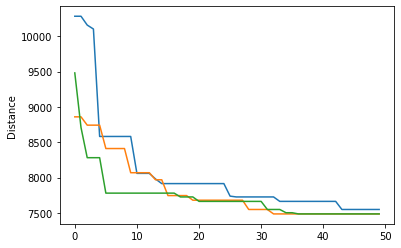

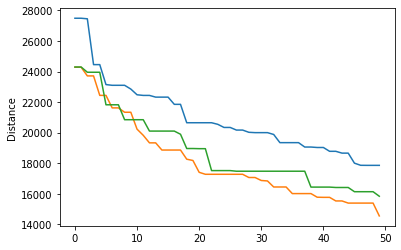

In [8]:
# Define three different values for population size
popSize1=10
popSize2=50
popSize3=100

# Here we run this GA algorithm 20 times for both 10 cities and 24 cities
all_results_10_cities_pop1=[]
all_results_10_cities_pop2=[]
all_results_10_cities_pop3=[]
all_results_24_cities_pop1=[]
all_results_24_cities_pop2=[]
all_results_24_cities_pop3=[]

i = 0
for i in range(20):
    all_results_10_cities_pop1.append(genetic_algorithm(10, popSize1)[0])
    all_results_10_cities_pop2.append(genetic_algorithm(10, popSize2)[0])
    all_results_10_cities_pop3.append(genetic_algorithm(10, popSize3)[0])
    all_results_24_cities_pop1.append(genetic_algorithm(24, popSize1)[0])
    all_results_24_cities_pop2.append(genetic_algorithm(24, popSize2)[0])
    all_results_24_cities_pop3.append(genetic_algorithm(24, popSize3)[0])
    
print("-------------10 cities with population size 10------------------")
print("Best of 20 runs: ", min(all_results_10_cities_pop1))
print("Worst of 20 runs: ", max(all_results_10_cities_pop1))
print("Mean of 20 runs: ", statistics.mean(all_results_10_cities_pop1))
print("Sandard deviation of 20 runs: ", statistics.stdev(all_results_10_cities_pop1))

print("-------------10 cities with population size 50------------------")
print("Best of 20 runs: ", min(all_results_10_cities_pop2))
print("Worst of 20 runs: ", max(all_results_10_cities_pop2))
print("Mean of 20 runs: ", statistics.mean(all_results_10_cities_pop2))
print("Sandard deviation of 20 runs: ", statistics.stdev(all_results_10_cities_pop2))

print("-------------10 cities with population size 100------------------")
print("Best of 20 runs: ", min(all_results_10_cities_pop3))
print("Worst of 20 runs: ", max(all_results_10_cities_pop3))
print("Mean of 20 runs: ", statistics.mean(all_results_10_cities_pop3))
print("Sandard deviation of 20 runs: ", statistics.stdev(all_results_10_cities_pop3))

print("-------------24 cities with population size 10 ------------------")
print("Best of 20 runs: ", min(all_results_24_cities_pop1))
print("Worst of 20 runs: ", max(all_results_24_cities_pop1))
print("Mean of 20 runs: ", statistics.mean(all_results_24_cities_pop1))
print("Sandard deviation of 20 runs: ",  statistics.stdev(all_results_24_cities_pop1))

print("-------------24 cities with population size 50 ------------------")
print("Best of 20 runs: ", min(all_results_24_cities_pop1))
print("Worst of 20 runs: ", max(all_results_24_cities_pop1))
print("Mean of 20 runs: ", statistics.mean(all_results_24_cities_pop1))
print("Sandard deviation of 20 runs: ",  statistics.stdev(all_results_24_cities_pop1))

print("-------------24 cities with population size 100 ------------------")
print("Best of 20 runs: ", min(all_results_24_cities_pop3))
print("Worst of 20 runs: ", max(all_results_24_cities_pop3))
print("Mean of 20 runs: ", statistics.mean(all_results_24_cities_pop3))
print("Sandard deviation of 20 runs: ",  statistics.stdev(all_results_24_cities_pop3))

for a in [10,24]:
    for b in [10,50,100]:   
        plt.plot(np.arange(50), genetic_algorithm(a,b)[1])
        plt.ylabel('Generation')
        plt.ylabel('Distance') # Here I choose distance as fitness value, shortest is the best
    plt.show()



Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [119]:
# Running time with poplation 100
start_time = time.time()
genetic_algorithm(10, popSize3)
print("Time for running: %s seconds" % (time.time() - start_time))
start_time = time.time()
genetic_algorithm(24, popSize3)
print("Time for running: %s seconds" % (time.time() - start_time))

Time for running: 0.17756390571594238 seconds
Time for running: 0.21541810035705566 seconds


**Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close?**  
For the first 10 cities, my GA found the shortest tour which is 7486.309999999999(Same as found by the exhaustive search).

**For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search?**   
In exhaustive search, the running time for 10 cities is about 35.75806999206543 seconds. By using GA, the running time is only 0.17756390571594238 seconds. 

When it comes to 24 cities, the result we have estimated in the first exercise is about 83656936433316.81 years. GA gives only 0.21541810035705566 seconds, which is much faster than exhaustive search. 

**How many tours were inspected by your GA as compared to by the exhaustive search?**   
n! tours were inspected by the exhaustive search (n is the number of cities).
Only populationSize * number of generations were inspected by my GA.

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [10]:
# Lamarckian

# It should better if I write the original function properly. Here I just rewrite the function.
def new_hill_climber(initial):
    max = 1000   
    # Calculate distance of this order
    i = 0
    distanceTravelled = calculate_distance(len(initial), initial)  
    min_distance = distanceTravelled
    
    # Find some neighbours and compare the distance
    for i in range(max):
        new_order = change_index(initial,len(initial))
        new_distance = calculate_distance(len(initial), new_order)
        
        if(new_distance < min_distance):
            min_distance = new_distance
            initial = new_order
            
    return initial, min_distance

def new_genetic_algorithm(n, pop_size):
    # Initialize population
    pop = init_population(n, pop_size)        
    parent_size = int(pop_size/2)
    best_fit=[]
    
    # Choose specified number of generations, for example, 50
    for i in range(0,50):
        offspring = []
        
        # Rank the population and select half of them with shorter distance
        parent_pop = rank_selection(n, pop)[0:parent_size]
    
        for p in parent_pop:
            random_index = np.random.randint(0, parent_size, size=1)[0]
            offspring.append(swap_mutation(pmx_pair(list(p), list(parent_pop[random_index]))[0]))
            offspring.append(swap_mutation(pmx_pair(list(p), list(parent_pop[random_index]))[1])) 
        
        if i < 1:
            new_offspring = []
            for q in offspring:
                new_offspring.append(new_hill_climber(list(q))[0])
        else: new_offspring = offspring.copy()
            
        # Survivor Selection: select from parents and offsprings and replace the old population
        new_pop = list(parent_pop) + list(new_offspring)
        pop= rank_selection(n, new_pop)[0:pop_size]

        best_fit.append(calculate_distance(n,pop[0]))
  
    distance=[]
    for p in pop:
        distance.append(calculate_distance(n,p))
    return distance[0], best_fit


# Define three different values for population size
popSize1=10
popSize2=50
popSize3=100

# Here we run this GA algorithm 20 times for both 10 cities and 24 cities
all_results_10_cities_pop1=[]
all_results_10_cities_pop2=[]
all_results_10_cities_pop3=[]
all_results_24_cities_pop1=[]
all_results_24_cities_pop2=[]
all_results_24_cities_pop3=[]

i = 0
for i in range(20):
    all_results_10_cities_pop1.append(new_genetic_algorithm(10, popSize1)[0])
    all_results_10_cities_pop2.append(new_genetic_algorithm(10, popSize2)[0])
    all_results_10_cities_pop3.append(new_genetic_algorithm(10, popSize3)[0])
    all_results_24_cities_pop1.append(new_genetic_algorithm(24, popSize1)[0])
    all_results_24_cities_pop2.append(new_genetic_algorithm(24, popSize2)[0])
    all_results_24_cities_pop3.append(new_genetic_algorithm(24, popSize3)[0])
    
print("-------------10 cities------------------")
print("Population size:",popSize1,"\nBest of 20 runs: ", min(all_results_10_cities_pop1),
      "Worst of 20 runs: ", max(all_results_10_cities_pop1),
      "Mean of 20 runs: ", statistics.mean(all_results_10_cities_pop1),
      "Sandard deviation of 20 runs: ", statistics.stdev(all_results_10_cities_pop1))

print("Population size:",popSize2,"\nBest of 20 runs: ", min(all_results_10_cities_pop2),
      "Worst of 20 runs: ", max(all_results_10_cities_pop2),
      "Mean of 20 runs: ", statistics.mean(all_results_10_cities_pop2),
      "Sandard deviation of 20 runs: ", statistics.stdev(all_results_10_cities_pop2))

print("Population size:",popSize3,"\nBest of 20 runs: ", min(all_results_10_cities_pop3),
      "Worst of 20 runs: ", max(all_results_10_cities_pop3),
      "Mean of 20 runs: ", statistics.mean(all_results_10_cities_pop3),
      "Sandard deviation of 20 runs: ", statistics.stdev(all_results_10_cities_pop3))
print("-------------24 cities------------------")
print("Population size:",popSize1,"\nBest of 20 runs: ", min(all_results_24_cities_pop1),
      "Worst of 20 runs: ", max(all_results_24_cities_pop1),
      "Mean of 20 runs: ", statistics.mean(all_results_24_cities_pop1),
      "Sandard deviation of 20 runs: ", statistics.stdev(all_results_24_cities_pop1))

print("Population size:",popSize2,"\nBest of 20 runs: ", min(all_results_24_cities_pop2),
      "Worst of 20 runs: ", max(all_results_24_cities_pop2),
      "Mean of 20 runs: ", statistics.mean(all_results_24_cities_pop2),
      "Sandard deviation of 20 runs: ", statistics.stdev(all_results_24_cities_pop2))

print("Population size:",popSize3,"\nBest of 20 runs: ", min(all_results_24_cities_pop3),
      "Worst of 20 runs: ", max(all_results_24_cities_pop3),
      "Mean of 20 runs: ", statistics.mean(all_results_24_cities_pop3),
      "Sandard deviation of 20 runs: ", statistics.stdev(all_results_24_cities_pop3))



-------------10 cities------------------
Population size: 10 
Best of 20 runs:  7486.309999999999 Worst of 20 runs:  7503.1 Mean of 20 runs:  7487.1494999999995 Sandard deviation of 20 runs:  3.7543581342223638
Population size: 50 
Best of 20 runs:  7486.309999999999 Worst of 20 runs:  7486.3099999999995 Mean of 20 runs:  7486.309999999999 Sandard deviation of 20 runs:  4.4507076830049563e-13
Population size: 100 
Best of 20 runs:  7486.309999999999 Worst of 20 runs:  7486.3099999999995 Mean of 20 runs:  7486.309999999999 Sandard deviation of 20 runs:  4.0405362444227585e-13
-------------24 cities------------------
Population size: 10 
Best of 20 runs:  12613.64 Worst of 20 runs:  14118.120000000004 Mean of 20 runs:  13353.8855 Sandard deviation of 20 runs:  427.2468746641261
Population size: 50 
Best of 20 runs:  12449.699999999999 Worst of 20 runs:  13487.76 Mean of 20 runs:  12997.2875 Sandard deviation of 20 runs:  256.7839439945982
Population size: 100 
Best of 20 runs:  12325.93 

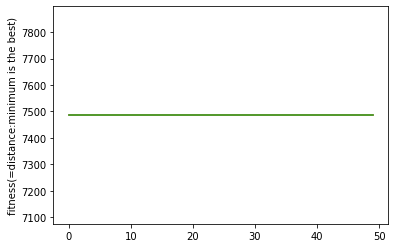

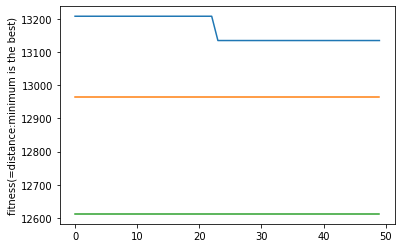

In [11]:
# Lamarckian
for a in [10,24]:
    for b in [10,50,100]:   
        plt.plot(np.arange(50), new_genetic_algorithm(a,b)[1])
        plt.ylabel('generation')
        plt.ylabel('fitness(=distance:minimum is the best)')
    plt.show()

In [30]:
# Balwinian: Do not replace the original poplulation, only improve fitness.
# Here I change the fitness to hill climber method and then set into the GA algorithm.

def fitness(data):
    fit=new_hill_climber(data)[1]
    return fit

def new_rank_selection(n, population):
    fitnessScore = [] # Fitness score as the route distance
    ranked_population = population.copy()
    for p in population:
        fitnessScore.append(fitness(p))
    rank = np.argsort(fitnessScore)
    ranked_population = [ranked_population[i] for i in rank]
    return ranked_population

def bal_genetic_algorithm(n, pop_size):
    # Initialize population
    pop = init_population(n, pop_size)        
    parent_size = int(pop_size/2)
    best_fit=[]
    
    # Choose specified number of generations, for example, 50
    for i in range(0,50):
        offspring = []
        
        # Rank the population and select half of them with shorter distance
        if i < 3:            
            parent_pop = new_rank_selection(n, pop)[0:parent_size]
        else: 
            parent_pop = rank_selection(n, pop)[0:parent_size]
    
        for p in parent_pop:
            random_index = np.random.randint(0, parent_size, size=1)[0]
            offspring.append(swap_mutation(pmx_pair(list(p), list(parent_pop[random_index]))[0]))
            offspring.append(swap_mutation(pmx_pair(list(p), list(parent_pop[random_index]))[1])) 
    
        # Survivor Selection: select from parents and offsprings and replace the old population
        new_pop = list(parent_pop) + list(offspring)
        pop= rank_selection(n, new_pop)[0:pop_size]

        best_fit.append(calculate_distance(n,pop[0]))
  
    distance=[]
    for p in pop:
        distance.append(calculate_distance(n,p))
    return distance[0], best_fit


# Here we run this GA algorithm 20 times for both 10 cities and 24 cities
all_results_10_cities_pop1=[]
all_results_10_cities_pop2=[]
all_results_10_cities_pop3=[]
all_results_24_cities_pop1=[]
all_results_24_cities_pop2=[]
all_results_24_cities_pop3=[]

i = 0
for i in range(20):
    all_results_10_cities_pop1.append(bal_genetic_algorithm(10, popSize1)[0])
    all_results_10_cities_pop2.append(bal_genetic_algorithm(10, popSize2)[0])
    all_results_10_cities_pop3.append(bal_genetic_algorithm(10, popSize3)[0])
    all_results_24_cities_pop1.append(bal_genetic_algorithm(24, popSize1)[0])
    all_results_24_cities_pop2.append(bal_genetic_algorithm(24, popSize2)[0])
    all_results_24_cities_pop3.append(bal_genetic_algorithm(24, popSize3)[0])
    
print("-------------10 cities------------------")
print("Population size:",popSize1,"\nBest of 20 runs: ", min(all_results_10_cities_pop1),
      "Worst of 20 runs: ", max(all_results_10_cities_pop1),
      "Mean of 20 runs: ", statistics.mean(all_results_10_cities_pop1),
      "Sandard deviation of 20 runs: ", statistics.stdev(all_results_10_cities_pop1))

print("Population size:",popSize2,"\nBest of 20 runs: ", min(all_results_10_cities_pop2),
      "Worst of 20 runs: ", max(all_results_10_cities_pop2),
      "Mean of 20 runs: ", statistics.mean(all_results_10_cities_pop2),
      "Sandard deviation of 20 runs: ", statistics.stdev(all_results_10_cities_pop2))

print("Population size:",popSize3,"\nBest of 20 runs: ", min(all_results_10_cities_pop3),
      "Worst of 20 runs: ", max(all_results_10_cities_pop3),
      "Mean of 20 runs: ", statistics.mean(all_results_10_cities_pop3),
      "Sandard deviation of 20 runs: ", statistics.stdev(all_results_10_cities_pop3))
print("-------------24 cities------------------")
print("Population size:",popSize1,"\nBest of 20 runs: ", min(all_results_24_cities_pop1),
      "Worst of 20 runs: ", max(all_results_24_cities_pop1),
      "Mean of 20 runs: ", statistics.mean(all_results_24_cities_pop1),
      "Sandard deviation of 20 runs: ", statistics.stdev(all_results_24_cities_pop1))

print("Population size:",popSize2,"\nBest of 20 runs: ", min(all_results_24_cities_pop2),
      "Worst of 20 runs: ", max(all_results_24_cities_pop2),
      "Mean of 20 runs: ", statistics.mean(all_results_24_cities_pop2),
      "Sandard deviation of 20 runs: ", statistics.stdev(all_results_24_cities_pop2))

print("Population size:",popSize3,"\nBest of 20 runs: ", min(all_results_24_cities_pop3),
      "Worst of 20 runs: ", max(all_results_24_cities_pop3),
      "Mean of 20 runs: ", statistics.mean(all_results_24_cities_pop3),
      "Sandard deviation of 20 runs: ", statistics.stdev(all_results_24_cities_pop3))


-------------10 cities------------------
Population size: 10 
Best of 20 runs:  7486.309999999999 Worst of 20 runs:  7737.95 Mean of 20 runs:  7499.7315 Sandard deviation of 20 runs:  56.19601992602606
Population size: 50 
Best of 20 runs:  7486.309999999999 Worst of 20 runs:  7549.16 Mean of 20 runs:  7492.594999999999 Sandard deviation of 20 runs:  19.344821828565646
Population size: 100 
Best of 20 runs:  7486.309999999999 Worst of 20 runs:  7486.310000000001 Mean of 20 runs:  7486.3099999999995 Sandard deviation of 20 runs:  4.642222716338805e-13
-------------24 cities------------------
Population size: 10 
Best of 20 runs:  15159.14 Worst of 20 runs:  19314.149999999998 Mean of 20 runs:  17080.734 Sandard deviation of 20 runs:  1139.8409670577557
Population size: 50 
Best of 20 runs:  12882.34 Worst of 20 runs:  17143.389999999996 Mean of 20 runs:  15406.217 Sandard deviation of 20 runs:  1018.0570276142373
Population size: 100 
Best of 20 runs:  13566.95 Worst of 20 runs:  15727.

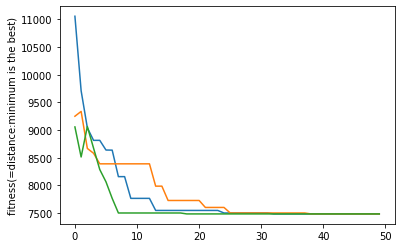

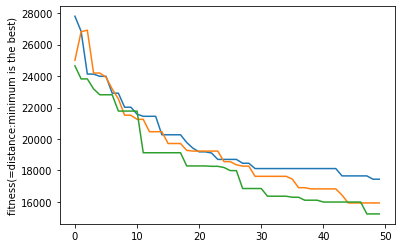

In [31]:
# Balwinian
for a in [10,24]:
    for b in [10,50,100]:   
        plt.plot(np.arange(50), bal_genetic_algorithm(a,b)[1])
        plt.ylabel('generation')
        plt.ylabel('fitness(=distance:minimum is the best)')
    plt.show()

I found the bug of the Lamarckian algorithm, and it works as I expected. And then I tried Balwinian model to improve only the fitness. To make all these code running faster, I limit the times of hill climbing methods by adding some constriants. Now it doesn't take so long time as before, much faster. 